# Import Libaries

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Clone Dataset

In [ ]:
# Cloning Dataset on Colab
! git clone https://github.com/source-droid/Covid-19-CXR-Dataset.git

In [2]:
import os
base_dir = 'dataset'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
train_covid_dir = os.path.join(train_dir, 'Covid')
train_normal_dir = os.path.join(train_dir, 'Normal')
test_covid_dir = os.path.join(test_dir, 'Covid')
test_normal_dir = os.path.join(test_dir, 'Normal')

In [3]:
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:3])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:3])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:3])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:3])

['00870a9c.jpg', '01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg', '03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg']
['NORMAL (1).png', 'NORMAL (100).png', 'NORMAL (1001).png']
['08ed451c576ee00935ee178ec85c57_jumbo-1.jpeg', '1-s2.0-S0085253820303616-gr1_lrg-a.png', '1-s2.0-S0735675720302746-gr1_lrg.jpg']
['NORMAL (10).png', 'NORMAL (1000).png', 'NORMAL (101).png']


In [4]:
print("train dataset covid images: ", len(train_covid_names))
print("train dataset normal images: ", len(train_normal_names))
print("test dataset covid images: ", len(test_covid_names))
print("test dataset normal images: ", len(test_normal_names))

print("total train images: ", len(train_covid_names+train_normal_names))
print("total test images: ", len(test_covid_names+test_normal_names))

train dataset covid images:  1330
train dataset normal images:  1072
test dataset covid images:  333
test dataset normal images:  269
total train images:  2402
total test images:  602


# Data Visualization

['dataset\\train\\Covid\\00870a9c.jpg', 'dataset\\train\\Covid\\01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg', 'dataset\\train\\Covid\\03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg', 'dataset\\train\\Covid\\071d06607edf81d70c940e043bce34_jumbo.jpeg', 'dataset\\train\\Covid\\078d2e0b3e4fec1d603efb0e818c31_jumbo.jpeg', 'dataset\\train\\Covid\\08d780ae.jpg', 'dataset\\train\\Covid\\0a6c60063b4bae4de001caaba306d1_jumbo.jpeg', 'dataset\\train\\Covid\\0a7faa2a.jpg']
['dataset\\train\\Normal\\NORMAL (1).png', 'dataset\\train\\Normal\\NORMAL (100).png', 'dataset\\train\\Normal\\NORMAL (1001).png', 'dataset\\train\\Normal\\NORMAL (1002).png', 'dataset\\train\\Normal\\NORMAL (1003).png', 'dataset\\train\\Normal\\NORMAL (1004).png', 'dataset\\train\\Normal\\NORMAL (1005).png', 'dataset\\train\\Normal\\NORMAL (1006).png']


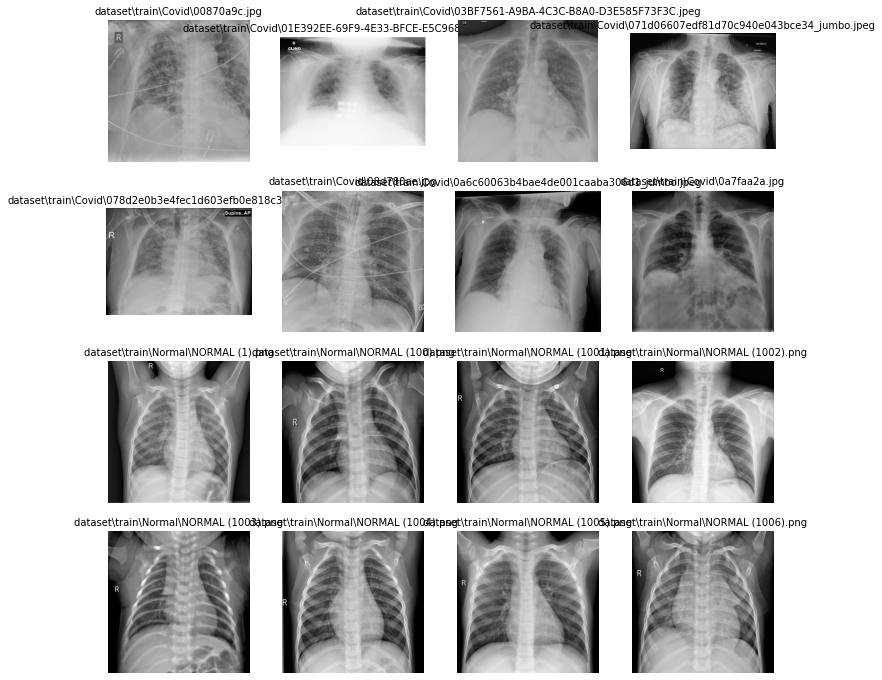

In [5]:
import matplotlib.image as mpimg

#set the number of colums and rows
nrows = 4
ncols = 4

#set the figure size
fig = plt.gcf()
fig.set_size_inches(12,12)

#get the filesnames from the covid & normal dir of the train dataset
next_covid_pic = [os.path.join(train_covid_dir,fname)for fname in train_covid_names[0:8]]
next_normal_pic = [os.path.join(train_normal_dir,fname)for fname in train_normal_names[0:8]]

# print the list
print(next_covid_pic)
print(next_normal_pic)

for i , img_path in enumerate(next_covid_pic+next_normal_pic):
  data = img_path.split('/',6)[0]
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('off')
  img = mpimg.imread(img_path)
  sp.set_title(data, fontsize = 10)
  plt.imshow(img, cmap = 'gray')

plt.show()

# Generating Training, Validation & testing Batches

In [6]:
# Generator for our training data
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

#Generator for our Validation data
validation_datagen = ImageDataGenerator(rescale = 1./255)

#Generator for our test data
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150,150),
                                                    subset = 'training',
                                                    batch_size = 32,
                                                    class_mode = 'binary')

validation_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150,150),
                                                    subset = 'validation',
                                                    batch_size = 32,
                                                    class_mode = 'binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size = (150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary')


Found 1922 images belonging to 2 classes.
Found 480 images belonging to 2 classes.
Found 602 images belonging to 2 classes.


In [7]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [8]:
train_generator.image_shape

(150, 150, 3)

# Dataset

## Credits and Links

1. [Covid Chest X Ray Dataset](https://github.com/ieee8023/covid-chestxray-dataset)

520 Covid-19 images are taken from above dataset

2. [COVID-19 Radiography Database](https://www.kaggle.com/tawsifurrahman/covid19-radiography-database)

1341 normal and 1143 Covid-19 images are taken from above dataset


# `Our Dataset`
Split | Normal | Covid19|Total|
------|:------:|:------:|:---:|
Train | 1072   |1330    |1922 |
Test  | 269    |333     |602  |
**Total**| **1341**   | **1663**    |   **3004**   |

# Build CNN Model

In [18]:
# Model With Dropout Layer


model = Sequential()

# add the convolutional layer
# filters, size of filters, padding, activation_function, inout_shape
model.add(Conv2D(32,(5,5), padding = 'SAME', activation = 'relu', input_shape = (150,150,3)))

# pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
model.add(Dropout(0.5)) ## Minimizes the overfitting

# add another convolutional layer
model.add(Conv2D(64,(5,5), padding = 'SAME', activation = 'relu'))

# pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
model.add(Dropout(0.5))

# Flatten the image to 1 dimensional array
model.add(Flatten())

# add a dense layer : amount of nodes, activation
model.add(Dense(256, activation = 'relu'))

# place a dropout layer
# 0.5 drop out rate is recommended, half input will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 87616)            

In [10]:
# Model Without Dropout Layer


model2 = Sequential()

# add the convolutional layer
# filters, size of filters, padding, activation_function, inout_shape
model2.add(Conv2D(32,(5,5), padding = 'SAME', activation = 'relu', input_shape = (150,150,3)))

# pooling layer
model2.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
#model2.add(Dropout(0.5)) ## Minimizes the overfitting

# add another convolutional layer
model2.add(Conv2D(64,(5,5), padding = 'SAME', activation = 'relu'))

# pooling layer
model2.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
#model2.add(Dropout(0.5))

# Flatten the image to 1 dimensional array
model2.add(Flatten())

# add a dense layer : amount of nodes, activation
model2.add(Dense(256, activation = 'relu'))

# place a dropout layer
# 0.5 drop out rate is recommended, half input will be dropped at each update
#model2.add(Dropout(0.5))
model2.add(Dense(1, activation = 'sigmoid'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 87616)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               22429952  
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [13]:
# Model with batch Normalization layer

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization


model3 = Sequential()

model3.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(150, 150, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(150, 150, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2, 2)))

model3.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2, 2)))

model3.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2, 2)))

model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))

model3.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

# Compile & Train Model

In [19]:
# compile model
from tensorflow.keras.optimizers import Adam # Adam is optimizer
# Loss function definition
model.compile(Adam(lr = 0.001),loss = 'binary_crossentropy', metrics = ['accuracy'])

In [20]:
# compile model
from tensorflow.keras.optimizers import Adam # Adam is optimizer
# Loss function definition
model2.compile(Adam(lr = 0.001),loss = 'binary_crossentropy', metrics = ['accuracy'])

In [21]:
# compile model
from tensorflow.keras.optimizers import Adam # Adam is optimizer
# Loss function definition
model3.compile(Adam(lr = 0.001),
               loss='binary_crossentropy',
               metrics=['accuracy'])

In [22]:
# train the model
history1 = model.fit(train_generator,
                              epochs=20,
                              validation_data = validation_generator,
                              validation_steps = 10)

Epoch 1/20
61/61 [==============================] - 108s 2s/step - loss: 0.9385 - accuracy: 0.7383 - val_loss: 0.2480 - val_accuracy: 0.9094
Epoch 2/20
61/61 [==============================] - 90s 1s/step - loss: 0.1879 - accuracy: 0.9344 - val_loss: 0.1596 - val_accuracy: 0.9750
Epoch 3/20
61/61 [==============================] - 108s 2s/step - loss: 0.1641 - accuracy: 0.9542 - val_loss: 0.1067 - val_accuracy: 0.9719
Epoch 4/20
61/61 [==============================] - 102s 2s/step - loss: 0.1432 - accuracy: 0.9516 - val_loss: 0.1750 - val_accuracy: 0.9625
Epoch 5/20
61/61 [==============================] - 99s 2s/step - loss: 0.1247 - accuracy: 0.9579 - val_loss: 0.1114 - val_accuracy: 0.9750
Epoch 6/20
61/61 [==============================] - 107s 2s/step - loss: 0.1599 - accuracy: 0.9480 - val_loss: 0.1375 - val_accuracy: 0.9500
Epoch 7/20
61/61 [==============================] - 93s 2s/step - loss: 0.1303 - accuracy: 0.9584 - val_loss: 0.0989 - val_accuracy: 0.9688
Epoch 8/20
61/61

In [23]:
# train the model
history2 = model2.fit(train_generator,
                              epochs=20,
                              validation_data = validation_generator,
                              validation_steps = 10)

Epoch 1/20
61/61 [==============================] - 75s 1s/step - loss: 0.4722 - accuracy: 0.8424 - val_loss: 0.1599 - val_accuracy: 0.9406
Epoch 2/20
61/61 [==============================] - 74s 1s/step - loss: 0.1193 - accuracy: 0.9563 - val_loss: 0.0910 - val_accuracy: 0.9625
Epoch 3/20
61/61 [==============================] - 73s 1s/step - loss: 0.0937 - accuracy: 0.9709 - val_loss: 0.0567 - val_accuracy: 0.9844
Epoch 4/20
61/61 [==============================] - 73s 1s/step - loss: 0.1591 - accuracy: 0.9495 - val_loss: 0.0962 - val_accuracy: 0.9719
Epoch 5/20
61/61 [==============================] - 73s 1s/step - loss: 0.1041 - accuracy: 0.9625 - val_loss: 0.0816 - val_accuracy: 0.9750
Epoch 6/20
61/61 [==============================] - 74s 1s/step - loss: 0.0910 - accuracy: 0.9693 - val_loss: 0.1120 - val_accuracy: 0.9625
Epoch 7/20
61/61 [==============================] - 73s 1s/step - loss: 0.0990 - accuracy: 0.9698 - val_loss: 0.0680 - val_accuracy: 0.9812
Epoch 8/20
61/61 [==

In [24]:
# train the model
history3 = model3.fit(
    train_generator, 
    epochs=20,
    validation_data=validation_generator,
    validation_steps=10,
)

Epoch 1/20
61/61 [==============================] - 170s 3s/step - loss: 0.6567 - accuracy: 0.9324 - val_loss: 4.4261 - val_accuracy: 0.5344
Epoch 2/20
61/61 [==============================] - 169s 3s/step - loss: 0.2197 - accuracy: 0.9594 - val_loss: 40.8538 - val_accuracy: 0.5437
Epoch 3/20
61/61 [==============================] - 184s 3s/step - loss: 0.2033 - accuracy: 0.9610 - val_loss: 47.5902 - val_accuracy: 0.5250
Epoch 4/20
61/61 [==============================] - 188s 3s/step - loss: 0.1433 - accuracy: 0.9683 - val_loss: 46.0743 - val_accuracy: 0.5531
Epoch 5/20
61/61 [==============================] - 183s 3s/step - loss: 0.0654 - accuracy: 0.9745 - val_loss: 45.1863 - val_accuracy: 0.5437
Epoch 6/20
61/61 [==============================] - 181s 3s/step - loss: 0.0975 - accuracy: 0.9735 - val_loss: 59.5538 - val_accuracy: 0.5625
Epoch 7/20
61/61 [==============================] - 179s 3s/step - loss: 0.2141 - accuracy: 0.9625 - val_loss: 31.4265 - val_accuracy: 0.5281
Epoch 8

# Plotting Loss and Accuracy Graph

Text(0.5, 1.0, 'Accuracy Evolution')

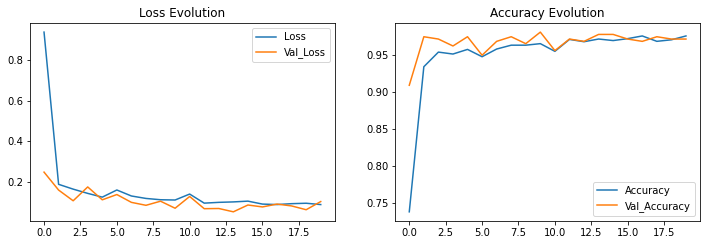

In [26]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history1.history['loss'], label='Loss')
plt.plot(history1.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history1.history['accuracy'], label='Accuracy')
plt.plot(history1.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

Text(0.5, 1.0, 'Accuracy Evolution')

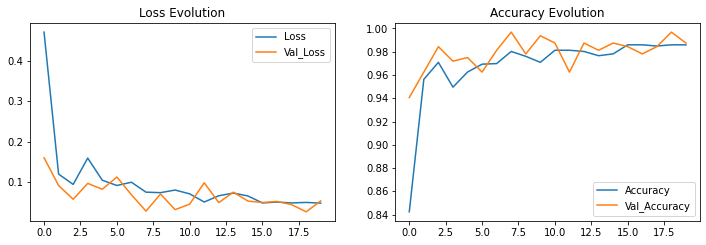

In [27]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history2.history['loss'], label='Loss')
plt.plot(history2.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history2.history['accuracy'], label='Accuracy')
plt.plot(history2.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

Text(0.5, 1.0, 'Accuracy Evolution')

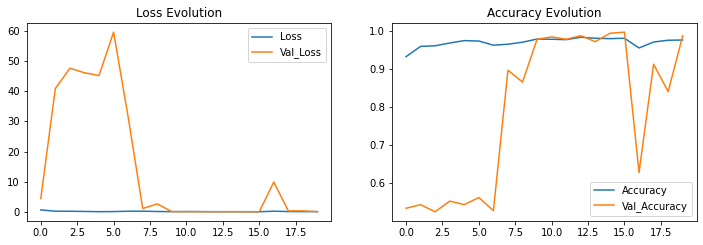

In [28]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history3.history['loss'], label='Loss')
plt.plot(history3.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history3.history['accuracy'], label='Accuracy')
plt.plot(history3.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

# Evaluation of Model

In [ ]:
test_loss, test_acc = model.evaluate(test_generator )
print('test acc: {} test loss: {}'.format(test_acc,test_loss))

In [ ]:
test_loss2, test_acc2 = model2.evaluate(test_generator )
print('test acc: {} test loss: {}'.format(test_acc2,test_loss2))

In [29]:
evaluation = model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train_generator)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

19/19 [==============================] - 21s 1s/step - loss: 0.1490 - accuracy: 0.9585
Test Accuracy: 95.85%
61/61 [==============================] - 36s 589ms/step - loss: 0.0994 - accuracy: 0.9755
Train Accuracy: 97.55%


In [30]:
evaluation = model2.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model2.evaluate(train_generator)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

19/19 [==============================] - 10s 515ms/step - loss: 0.0328 - accuracy: 0.9867
Test Accuracy: 98.67%
61/61 [==============================] - 36s 596ms/step - loss: 0.0353 - accuracy: 0.9870
Train Accuracy: 98.70%


In [31]:
evaluation = model3.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model3.evaluate(train_generator)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

19/19 [==============================] - 11s 592ms/step - loss: 0.0658 - accuracy: 0.9850
Test Accuracy: 98.50%
61/61 [==============================] - 41s 677ms/step - loss: 0.0593 - accuracy: 0.9834
Train Accuracy: 98.34%


# Confusion Matrics

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
pred = model.predict(test_generator)

print(confusion_matrix(test_generator.classes, pred > 0.5))
pd.DataFrame(classification_report(test_generator.classes, pred > 0.5, output_dict=True))

[[163 170]
 [147 122]]


,0,1,accuracy,macro avg,weighted avg
precision,0.525806,0.417808,0.473422,0.471807,0.477548
recall,0.489489,0.453532,0.473422,0.471511,0.473422
f1-score,0.506998,0.434938,0.473422,0.470968,0.474799
support,333.000000,269.000000,0.473422,602.000000,602.000000


In [36]:

pred = model2.predict(test_generator)

print(confusion_matrix(test_generator.classes, pred > 0.5))
pd.DataFrame(classification_report(test_generator.classes, pred > 0.5, output_dict=True))

[[183 150]
 [148 121]]


,0,1,accuracy,macro avg,weighted avg
precision,0.552870,0.446494,0.504983,0.499682,0.505337
recall,0.549550,0.449814,0.504983,0.499682,0.504983
f1-score,0.551205,0.448148,0.504983,0.499676,0.505155
support,333.000000,269.000000,0.504983,602.000000,602.000000


In [37]:

pred = model3.predict(test_generator)

print(confusion_matrix(test_generator.classes, pred > 0.5))
pd.DataFrame(classification_report(test_generator.classes, pred > 0.5, output_dict=True))

[[184 149]
 [144 125]]


,0,1,accuracy,macro avg,weighted avg
precision,0.560976,0.456204,0.513289,0.508590,0.514159
recall,0.552553,0.464684,0.513289,0.508618,0.513289
f1-score,0.556732,0.460405,0.513289,0.508569,0.513689
support,333.000000,269.000000,0.513289,602.000000,602.000000


# Transfer Learning
# DenseNet
Densenet is a convolutional network where each layer is connected to all other layers that are deeper in the network:

* The first layer is connected to the 2nd, 3rd, 4th etc.
* The second layer is conected to the 3rd, 4th, 5th etc.

![download.png](https://pytorch.org/assets/images/densenet1.png)

for more information about the DenseNet Architecture visit this website : https://keras.io/api/applications/densenet/


In [38]:
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K


In [39]:
densedet121 = DenseNet121(input_shape=(150, 150, 3), include_top=False, weights='imagenet', pooling='avg')

densedet121.summary()

29089792/29084464 [==============================] - 3s 0us/step
Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 75, 75, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1/conv[0][0]                 
_______________________

In [40]:
layers = densedet121.layers
print(f"The model has {len(layers)} layers")

The model has 428 layers


In [41]:
print(f"The input shape {densedet121.input}")
print(f"The output shape {densedet121.output}")

The input shape Tensor("input_1:0", shape=(None, 150, 150, 3), dtype=float32)
The output shape Tensor("avg_pool/Mean:0", shape=(None, 1024), dtype=float32)


In [48]:

#model = Sequential()
densedet121 = DenseNet121(include_top=False, weights='imagenet')
x = densedet121.output

x = GlobalAveragePooling2D()(x)

predictions = Dense(1, activation="sigmoid")(x)

model4 = Model(inputs=densedet121.input, outputs=predictions)
#model.add(densedet121)
#model.add(GlobalAveragePooling2D())
#model.add(Dense(1, activation='sigmoid'))


model4.compile(
               loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [49]:
history4 = model4.fit(
    train_generator, 
    epochs=20,
    validation_data=validation_generator,
    validation_steps=10,
)

Epoch 1/20
61/61 [==============================] - 613s 10s/step - loss: 0.1322 - accuracy: 0.9542 - val_loss: 0.9519 - val_accuracy: 0.8188
Epoch 2/20
61/61 [==============================] - 619s 10s/step - loss: 0.0407 - accuracy: 0.9860 - val_loss: 0.0148 - val_accuracy: 0.9937
Epoch 3/20
61/61 [==============================] - 551s 9s/step - loss: 0.0278 - accuracy: 0.9891 - val_loss: 1.3600 - val_accuracy: 0.8469
Epoch 4/20
61/61 [==============================] - 518s 8s/step - loss: 0.0210 - accuracy: 0.9922 - val_loss: 0.0613 - val_accuracy: 0.9844
Epoch 5/20
61/61 [==============================] - 524s 9s/step - loss: 0.0145 - accuracy: 0.9948 - val_loss: 2.4321 - val_accuracy: 0.5813
Epoch 6/20
61/61 [==============================] - 520s 9s/step - loss: 0.0809 - accuracy: 0.9750 - val_loss: 1.1067 - val_accuracy: 0.8562
Epoch 7/20
61/61 [==============================] - 524s 9s/step - loss: 0.1328 - accuracy: 0.9579 - val_loss: 4.8409 - val_accuracy: 0.7312
Epoch 8/20


Text(0.5, 1.0, 'Accuracy Evolution')

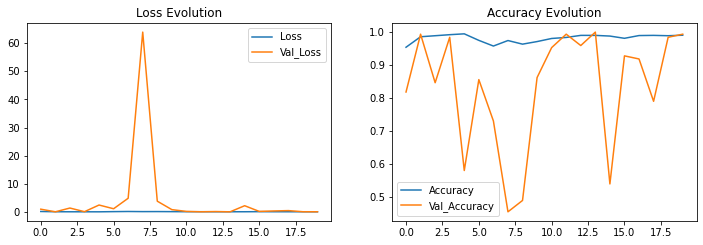

In [50]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history4.history['loss'], label='Loss')
plt.plot(history4.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history4.history['accuracy'], label='Accuracy')
plt.plot(history4.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [51]:
evaluation = model4.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model4.evaluate(train_generator)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

19/19 [==============================] - 27s 1s/step - loss: 0.1039 - accuracy: 0.9684
Test Accuracy: 96.84%
61/61 [==============================] - 68s 1s/step - loss: 0.0311 - accuracy: 0.9912
Train Accuracy: 99.12%


# Evaluation

In [52]:
predicted_vals = model.predict(test_generator, steps=len(test_generator))

print(confusion_matrix(test_generator.classes, predicted_vals > 0.5))
pd.DataFrame(classification_report(test_generator.classes, predicted_vals > 0.5, output_dict=True))

[[174 159]
 [136 133]]


,0,1,accuracy,macro avg,weighted avg
precision,0.561290,0.455479,0.509967,0.508385,0.514009
recall,0.522523,0.494424,0.509967,0.508473,0.509967
f1-score,0.541213,0.474153,0.509967,0.507683,0.511248
support,333.000000,269.000000,0.509967,602.000000,602.000000


# VGG16
Presented in 2014, VGG16 has a very simple and classical architecture, with blocks of 2 or 3 convolutional layers followed by a pooling layer, plus a final dense network composed of 2 hidden layers (of 4096 nodes each) and one output layer (of 1000 nodes). Only 3x3 filters are used.

![download7.png](https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png)

In [53]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, BatchNormalization
from keras.applications.vgg16 import VGG16
import keras

vgg16_base_model = VGG16(input_shape=(150,150,3),include_top=False,weights='imagenet')

    
vgg16_base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [54]:


    vgg16_model = tf.keras.Sequential([
        vgg16_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.5),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.5),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.5),
        Dense(1,activation="sigmoid")
    ])

In [55]:
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    vgg16_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [56]:
history5 = vgg16_model.fit(
    train_generator, 
    epochs=20,
    validation_data=validation_generator,
    validation_steps=10,
)


Epoch 1/20
61/61 [==============================] - 454s 7s/step - loss: 0.3863 - accuracy: 0.8392 - precision: 0.7942 - recall: 0.8636 - val_loss: 101.4370 - val_accuracy: 0.4250 - val_precision: 0.4250 - val_recall: 1.0000
Epoch 2/20
61/61 [==============================] - 450s 7s/step - loss: 0.2087 - accuracy: 0.9329 - precision: 0.9166 - recall: 0.9347 - val_loss: 31.4768 - val_accuracy: 0.4187 - val_precision: 0.4187 - val_recall: 1.0000
Epoch 3/20
61/61 [==============================] - 446s 7s/step - loss: 0.2241 - accuracy: 0.9308 - precision: 0.9124 - recall: 0.9347 - val_loss: 84593.6406 - val_accuracy: 0.5625 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
61/61 [==============================] - 444s 7s/step - loss: 0.1873 - accuracy: 0.9329 - precision: 0.9194 - recall: 0.9312 - val_loss: 98.5549 - val_accuracy: 0.4563 - val_precision: 0.4563 - val_recall: 1.0000
Epoch 5/20
61/61 [==============================] - 445s 7s/step - loss: 0.1640 - accuracy: 

Text(0.5, 1.0, 'Accuracy Evolution')

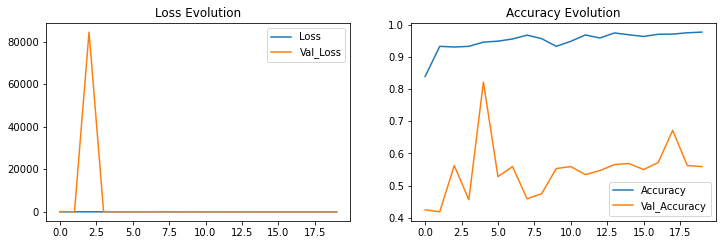

In [57]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history5.history['loss'], label='Loss')
plt.plot(history5.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history5.history['accuracy'], label='Accuracy')
plt.plot(history5.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [58]:
evaluation =vgg16_model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = vgg16_model.evaluate(train_generator)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

19/19 [==============================] - 29s 2s/step - loss: 3.8891 - accuracy: 0.5532 - precision: 0.0000e+00 - recall: 0.0000e+00
Test Accuracy: 55.32%
61/61 [==============================] - 89s 1s/step - loss: 3.9435 - accuracy: 0.5536 - precision: 0.0000e+00 - recall: 0.0000e+00
Train Accuracy: 55.36%


# ResNet

See the full explanation and schemes in the Research Paper on Deep Residual Learning (https://arxiv.org/pdf/1512.03385.pdf)

In [59]:
from keras.applications import ResNet50

resnet_base_model = ResNet50(input_shape=(150,150,3), include_top=False, weights='imagenet')



94773248/94765736 [==============================] - 9s 0us/step


In [60]:
resnet_base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_9[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [61]:
    resnet_model = tf.keras.Sequential([
        resnet_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.5),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.5),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.5),
        Dense(1,activation="sigmoid")
    ])

    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    resnet_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [62]:
history6 = resnet_model.fit(
    train_generator, 
    epochs=20,
    validation_data=validation_generator,
    validation_steps=10
)


Epoch 1/20
61/61 [==============================] - 442s 7s/step - loss: 0.2529 - accuracy: 0.9063 - precision: 0.8960 - recall: 0.8939 - val_loss: 855.8226 - val_accuracy: 0.5594 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
61/61 [==============================] - 444s 7s/step - loss: 0.0792 - accuracy: 0.9766 - precision: 0.9799 - recall: 0.9674 - val_loss: 102.1546 - val_accuracy: 0.5250 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
61/61 [==============================] - 443s 7s/step - loss: 0.0697 - accuracy: 0.9766 - precision: 0.9743 - recall: 0.9732 - val_loss: 2.6023 - val_accuracy: 0.5437 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
61/61 [==============================] - 440s 7s/step - loss: 0.0787 - accuracy: 0.9766 - precision: 0.9743 - recall: 0.9732 - val_loss: 2.6567 - val_accuracy: 0.5688 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/20
61/61 [==============================] - 444s 7s/step - loss:

Text(0.5, 1.0, 'Accuracy Evolution')

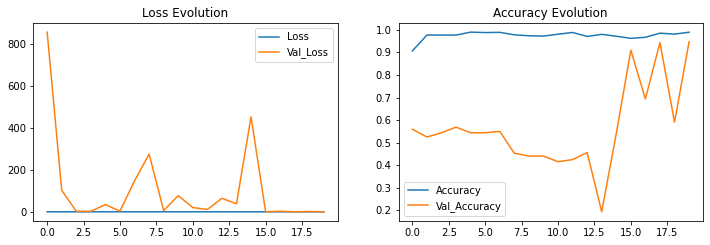

In [63]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history6.history['loss'], label='Loss')
plt.plot(history6.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history6.history['accuracy'], label='Accuracy')
plt.plot(history6.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [64]:
evaluation =resnet_model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = resnet_model.evaluate(train_generator)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

19/19 [==============================] - 27s 1s/step - loss: 0.2678 - accuracy: 0.9452 - precision: 0.8960 - recall: 0.9926
Test Accuracy: 94.52%
61/61 [==============================] - 64s 1s/step - loss: 0.2092 - accuracy: 0.9527 - precision: 0.9173 - recall: 0.9825
Train Accuracy: 95.27%


# InceptionNet
Also known as GoogleNet, this architecture presents sub-networks called inception modules, which allows fast training computing, complex patterns detection, and optimal use of parameters

for more information visit https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/43022.pdf



In [65]:
from keras.applications import InceptionV3

inception_base_model = InceptionV3(input_shape=(150,150,3),include_top=False,weights='imagenet')



87916544/87910968 [==============================] - 9s 0us/step


In [66]:
    inception_model = tf.keras.Sequential([
        inception_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.5),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.5),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.5),
        Dense(1,activation="sigmoid")
    ])

    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    inception_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [68]:
history7 = inception_model.fit(
    train_generator, 
    epochs=20,
    validation_data=validation_generator,
    validation_steps=10
)


Epoch 1/20
61/61 [==============================] - 249s 4s/step - loss: 0.3236 - accuracy: 0.8757 - precision: 0.8788 - recall: 0.8368 - val_loss: 4.6685 - val_accuracy: 0.3906 - val_precision: 0.3409 - val_recall: 0.4317
Epoch 2/20
61/61 [==============================] - 242s 4s/step - loss: 0.0884 - accuracy: 0.9750 - precision: 0.9742 - recall: 0.9697 - val_loss: 0.1348 - val_accuracy: 0.9781 - val_precision: 0.9583 - val_recall: 0.9928
Epoch 3/20
61/61 [==============================] - 232s 4s/step - loss: 0.0565 - accuracy: 0.9807 - precision: 0.9835 - recall: 0.9732 - val_loss: 0.0317 - val_accuracy: 0.9906 - val_precision: 0.9856 - val_recall: 0.9928
Epoch 4/20
61/61 [==============================] - 237s 4s/step - loss: 0.1794 - accuracy: 0.9475 - precision: 0.9555 - recall: 0.9254 - val_loss: 84364.6250 - val_accuracy: 0.4219 - val_precision: 0.4219 - val_recall: 1.0000
Epoch 5/20
61/61 [==============================] - 232s 4s/step - loss: 0.1104 - accuracy: 0.9714 - pre

Text(0.5, 1.0, 'Accuracy Evolution')

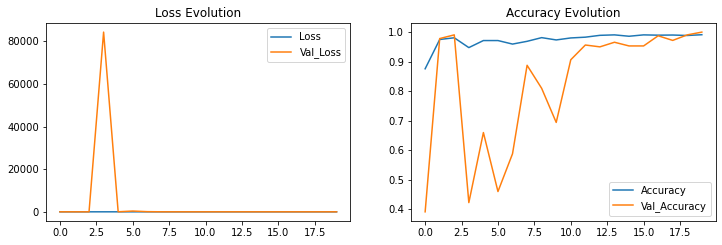

In [69]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history7.history['loss'], label='Loss')
plt.plot(history7.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history7.history['accuracy'], label='Accuracy')
plt.plot(history7.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [70]:
evaluation =inception_model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = inception_model.evaluate(train_generator)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

19/19 [==============================] - 25s 1s/step - loss: 0.0440 - accuracy: 0.9834 - precision: 0.9814 - recall: 0.9814
Test Accuracy: 98.34%
61/61 [==============================] - 44s 716ms/step - loss: 0.0419 - accuracy: 0.9938 - precision: 0.9907 - recall: 0.9953
Train Accuracy: 99.38%


In [ ]:
# test your model with some images from your local computer to predict whether a patient is affected by Covid19 or not
import numpy as np
from google.colab import files 
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/'+fn
  print(path)
  img = image.load_img(path, target_size = (150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes == 0:
    print('Covid19')
  else:
    print('Normal')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
model_save_name = 'colab_with_dropout.h5'
path = F"/content/gdrive/My Drive/Temp/{model_save_name}" 
model.save(path)

In [ ]:
model_save_name = 'colab_without_dropout.h5'
path = F"/content/gdrive/My Drive/Temp/{model_save_name}" 
model2.save(path)